# Accessing and using data cubes
## Spatial overlay, visualization and modeling – Python tutorial

Before starting with the code tutoral, it's import to provide a conceptual background for raster data cubes, Cloud-Optimized GeoTIFF (COG), SpatioTemporal Asset Catalogs (STAC) and geospatial libraries in Python.

## Raster Data Cube

[Kopp et al., 2019](https://doi.org/10.3390/data4030094) defines **data cubes** as a generic term used to describe an array of multiple dimensions. Data cubes help to organize data, simplifying data management and often improving the performance of queries and analysis.

According to [Appel & Pebesma, 2019](https://doi.org/10.3390/data4030092) a **regular**, **dense** **raster data cube** is a four-dimensional array with dimensions **x** (*longitude or easting*), **y** (*latitude or northing*), **time**, and **bands** with the following properties:
* Spatial dimensions refer to a single **spatial reference system** (SRS),
* Cells of a data cube have a **constant spatial size** (with regard to the cube’s SRS),
* The spatial reference is defined by a simple **offset** and the **cell size** per axis (i.e. the cube axes are aligned the SRS axes),
* Cells of a data cube have a **constant temporal duration**, defined by an integer number and a date / time (*years, months, days, hours, minutes, or seconds*),
* The **temporal reference** is defined by a simple start date/time and the temporal duration of cells,
* For **every combination** of dimensions, a cell has a single, scalar (real) **attribute value**.

Building a data cube can include **information loss**, so it should be a process that considers **user definitions** and **restrictions** for one or more applications. In general, the users are capable to construct data cubes from **collections of images** using tools as [gdalcubes](https://github.com/appelmar/gdalcubes_R), [sits](https://e-sensing.github.io/sitsbook/earth-observation-data-cubes.html) or [force](https://www.uni-trier.de/?id=63673).

Here are a few examples of existing raster data cubes:
* [Australian Geoscience Data Cube (data)](https://doi.org/10.1016/j.rse.2017.03.015)
* [Swiss Data Cube (data)](https://doi.org/10.6084/m9.figshare.14635485)
* [Open Environmental Data Cube EU (data)](http://stac.opendatascience.eu)
* [Google Earth Engine (platform)](https://doi.org/10.1016/j.rse.2017.06.031)
* [Microsoft Planetary Computing (platform)](https://planetarycomputer.microsoft.com/)
* [Open Data Cube (platform)](https://www.opendatacube.org/)
* [OpenEO Platform (platform)](https://openeo.cloud/)


![Raster data cube](Accessing_and_using_data_cubes_summer_school_2022/data_cube.png)

Image source: [Kopp et al., 2019](https://doi.org/10.3390/data4030094)

## Cloud-Optimized GeoTIFF (COG)

A COG is a regular [GeoTIFF](https://www.ogc.org/standards/geotiff) file, aimed at being hosted on a HTTP file server, with an [internal organization](https://www.cogeo.org/in-depth.html) that enables more efficient workflows on the cloud ([Cloud-native geospatial formats](https://www.ogc.org/blog/4609)). There are **three key aspects** that makes COG a powerful format for geospatial applications:
* [**Lossless compression**](https://gdal.org/drivers/raster/cog.html#general-creation-options): compression able to restore / rebuild the file data in its original form after the file is decompressed without lose data.
* [**Tilling and overviews**](https://gdal.org/drivers/raster/cog.html#creation-options): tilling **strips** a raster data into regular **squared tiles** (256 x 256), keeping them **physically close** on storage devices (hard drives) improving the read performance for a subset of the raster data. **Overviews** are pre-computed representations in **coarser spatial resolution** for raster data, enabling a quick visualization of all the pixels / cells without load the **full data** from the storage device.
* [**HTTP Get Range requests**](https://developer.mozilla.org/en-US/docs/Web/HTTP/Range_requests): request that asks the server to send only a **portion** of an HTTP message back to a client, enabling **random access** to the raster data.

![Raster data cube](Accessing_and_using_data_cubes_summer_school_2022/cog.png)

One of the best ways to make a COG available is using **cloud [Object Store](https://www.redhat.com/en/topics/data-storage/file-block-object-storage) solution** (AWS, Google Cloud Storage, Wasabi). Object storage is a data storage architecture for large stores of unstructured data, which designates each piece of data as an object, keeps it in a separate storehouse, and bundles it with **metadata** and a **unique identifier** for easy access and retrieval. 

![Object Store](Accessing_and_using_data_cubes_summer_school_2022/object_store.png)

Image source: [RedHat](https://www.redhat.com/en/topics/data-storage/file-block-object-storage)

## SpatioTemporal Asset Catalog (STAC)

The STAC is **specification** that provides a common language to describe a range of geospatial information, seeking to make it more easily indexed and discoverable. A **spatiotemporal asset** (Imagery, SAR, Point Clouds, Data Cubes, Full Motion Video, etc) is any file that represents information about the **Earth** captured in a certain **space** and **time**.

![STAC](Accessing_and_using_data_cubes_summer_school_2022/stac.png)

* [STAC API](https://github.com/radiantearth/stac-api-spec): family of specifications aim to standardize the way geospatial asset metadata is structured and queried.
* [STAC catalog](https://github.com/radiantearth/stac-spec/blob/master/catalog-spec/catalog-spec.md): represents a logical group of other Catalog, Collection, and Item objects. These Items can be linked to directly from a Catalog, or the Catalog can link to other Catalogs (often called sub-catalogs) that contain links to Collections and Items.
* [STAC collection](https://github.com/radiantearth/stac-spec/blob/master/collection-spec/collection-spec.md): a set of common fields to describe a group of Items that share properties and metadata. The Collection Specification shares all fields with the STAC Catalog Specification (with different allowed values for type and stac_extensions) and adds fields to describe the whole dataset and the included set of Items. Collections can have both parent Catalogs and Collections and child Items, Catalogs and Collections.
* [STAC item](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md): is a GeoJSON Feature augmented with foreign members relevant to a STAC object. These include fields that identify the time range and assets of the Item. An Item is the core object in a STAC Catalog, containing the core metadata that enables any client to search or crawl online catalogs of spatial 'assets' (e.g., satellite imagery, derived data, DEMs).
* [STAC best practices](https://github.com/radiantearth/stac-spec/blob/master/best-practices.md#:~:text=The%20current%20best%20practice%20is,match%20an%20existing%20web%20presence.): number of recommendations for creating real world SpatioTemporal Asset Catalogs.
* [Static and Dynamic Catalogs](https://github.com/radiantearth/stac-spec/blob/master/overview.md#static-and-dynamic-catalogs): Static catalog is composed by linked json files on a file server or an object storage service (AWS S3). Dynamic catalog is any catalog that is not just files.
* *Dynamic Catalog*:
    * [stac-server](https://github.com/stac-utils/stac-server): "Official" implementation of the STAC API. 
    * [pygeoapi](https://docs.pygeoapi.io/en/stable/configuration.html?highlight=stac#resources): Python server implementation of the OGC API suite of standards
    * [Franklin](https://github.com/azavea/franklin): A STAC and OGC API Features compliant web service focused on ease-of-use for end-users.
    * [staccato](https://github.com/planetlabs/staccato): Server that enables browsing and search of geospatial assets like satellite imagery. It implements the SpatioTemporal Asset Catalog (STAC) v1.0.0 standard and is backed by Elasticsearch. 

## Geospatial software stack in python

Mostly of python geospatial libraries depends of ```OGR/GDAL```, ```GEOS``` and ```PROJ``` (C/C++ libraries), which means that ```rasterio``` is not actually responsible to read or write raster files, under the hood ```GDAL``` does this tasks. The easiest way to manage these C/C++ dependencies in python is using [Conda](https://docs.conda.io/en/latest/) (or its faster brother [Mamba](https://mamba.readthedocs.io/en/latest/)) to geospatial libraries.

![Python Geospatial Stack](https://gitlab.com/leal.parente/geo-snippets/-/raw/main/hackathon/pasture_classification_summer_school_2022/python_geospatial_stack.png)

* [Fiona](https://fiona.readthedocs.io/en/latest/README.html):Fiona reads and writes geographic data files and thereby helps Python programmers integrate geographic information systems with other computer systems. Fiona contains extension modules that link the Geospatial Data Abstraction Library (GDAL).
* [GeoPandas](https://geopandas.org/en/stable/): GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.
* [GEOS](https://libgeos.org/): library for computational geometry with a focus on algorithms used in geographic information systems (GIS) software,
* [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/): Interactive maps in the Jupyter notebook.
* [Jupyter Notebooks](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html#notebook): Jupyter notebooks are documents that combine live runnable code with narrative text (Markdown), equations (LaTeX), images, interactive visualizations and other rich output.
* [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/): JupyterLab enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner.
* [Numpy](https://numpy.org/): library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* [OGR/GDAL](https://gdal.org/): GDAL is a translator library for raster and vector geospatial data formats,
* [Pandas](https://pandas.pydata.org/): library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 
* [PROJ](https://proj.org/): PROJ is a generic coordinate transformation software that transforms geospatial coordinates from one coordinate reference system (CRS) to another.
* [pygeos](https://pygeos.readthedocs.io/en/stable/): library with vectorized geometry functions. The geometry operations are done in the open-source geometry library GEOS.
* [python-gdal](https://pypi.org/project/GDAL/): This Python package and extensions are a number of tools for programming and manipulating the GDAL Geospatial Data Abstraction Library
* [scikit-learn](https://scikit-learn.org/stable/getting_started.html): open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.
* [SciPy](https://scipy.org/): SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.
* [Shapely](https://pypi.org/project/Shapely/): Package for manipulation and analysis of planar geometric objects. It is based on the widely deployed GEOS (the engine of PostGIS) and JTS (from which GEOS is ported) libraries. Shapely is not concerned with data formats or coordinate systems, but can be readily integrated with packages that are.
* [Statsmodels](https://www.statsmodels.org/stable/index.html): Library that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration

## Installing the libraries

Most part of these libraries are used by eumap, a liibrary developed to enable easier access to several spatial layers prepared for Continental Europe ([ecodatacube.org](https://ecodatacube.eu) and [stac.ecodatacube.eu](https://stac.ecodatacube.eu)), as well the processing classes and functions used to produce them.

### Regular Python environment 

It's possible to install eumap through [Conda/Pip](https://eumap.readthedocs.io/en/latest/index.html#conda) or used directly inside the Docker container [opengeohub/pygeo-ide](https://hub.docker.com/r/opengeohub/pygeo-ide). Here we will use ``pip``:

In [ ]:
#!pip install ipyleaflet pyarrow
#!pip install -e 'git+https://gitlab.com/geoharmonizer_inea/eumap.git#egg=eumap[full]'

### Google Colab

In [Colab](https://colab.research.google.com/) it's necessary do the installation using a the ```colab``` branch:

In [1]:
# Inside of Google Colab
#!pip install -e 'git+https://gitlab.com/geoharmonizer_inea/eumap.git@colab_deps#egg=eumap[full]'

We need also execute the follow commands to fix CURL errors related to rasterio:

In [2]:
# Fix for curl certificates (rasterio virtual connectors)
# RasterioIOError: CURL error: error setting certificate verify locations:   CAfile: /etc/pki/tls/certs/ca-bundle.crt   CApath: none
#!apt install ca-certificates
#!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
#!mkdir -p /etc/pki/tls/certs
#!cp /etc/ssl/certs/ca-certificates.crt /etc/pki/tls/certs/ca-bundle.crt
#!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
#!ls /etc/pki/tls/certs

## Training samples

The training samples are available as [Parquet format](https://spark.apache.org/docs/latest/sql-data-sources-parquet.html), and as it is a [Cloud-Native data format](https://www.jumpingrivers.com/blog/parquet-file-format-big-data-r/), you can access the file to retrieve the schema (```columns + data type```) without downloading all the records. Using [PyArrow](https://arrow.apache.org/docs/index.html), first we need to create a [S3 FileSystem](https://arrow.apache.org/docs/python/generated/pyarrow.fs.S3FileSystem.html) pointing to ```https://s3.eu-central-1.wasabisys.com/global-pastures```, and later read only the the schema:

In [3]:
import warnings
warnings.filterwarnings('ignore')

from pyarrow import fs
import pyarrow.parquet as pq

scheme = 'https'
endpoint = "s3.eu-central-1.wasabisys.com"
bucket = 'global-pastures'
httpfs = fs.S3FileSystem(scheme=scheme, endpoint_override=endpoint)

train_path = 'samples/lcv_pasture_classif.matrix.train_2000..2020_brazil.eumap_summer.school.2022.pq'

ds = pq.ParquetDataset(f'{bucket}/{train_path}', filesystem=httpfs)
print(f'Total number of columns: {len(ds.schema)}')
#print(ds.schema)

Total number of columns: 374


Forget about all the **covariates** that were already overlaid and let's **read only** the columns associated to **samples**:

In [4]:
cols_of_interest = ['tile_id', 'area', 'year', 'latitude', 'longitude', 'class', 'class_pct' , 'class_label']
print(f'Number of columns of interest: {len(cols_of_interest)}')

Number of columns of interest: 8


Here we are actually reading the **records / rows**, but only considering the **columns of interest**:

In [5]:
train_samples = ds.read(columns=cols_of_interest).to_pandas()
train_samples

tile_id    area  year   latitude  longitude  class  class_pct  \
0       1621  brazil  2019  -4.209045 -58.700158      3        100   
1       1621  brazil  2019  -4.209045 -58.695861      3        100   
2       1621  brazil  2019  -4.213359 -58.700158      3        100   
3       1621  brazil  2019  -4.213359 -58.695861      3        100   
4       1621  brazil  2019  -4.213359 -58.691565      3        100   
...      ...     ...   ...        ...        ...    ...        ...   
1547    1384   eumap  2020  44.211074  10.835721      3        100   
1548    1384   eumap  2020  44.207971  10.835676      3        100   
1549    1384   eumap  2020  44.207937  10.839970      3        100   
1550    1384   eumap  2020  44.207902  10.844265      3        100   
1551     957   eumap  2020  66.917981  15.900862      2        100   

                        class_label  
0                            Others  
1                            Others  
2                            Others  
3                            Others  
4                            Others  
...                             ...  
1547                         Others  
1548                         Others  
1549                         Others  
1550                         Others  
1551  Natural or semi-natural grass  

[1552 rows x 8 columns]

Now, it's time to analyze how many samples we have for every **year**, **area** and **class**: 

<AxesSubplot:title={'center':'Training samples - Years'}>

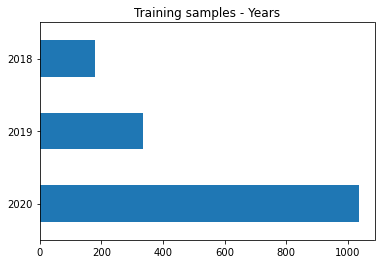

In [6]:
train_samples['year'].value_counts().plot(kind='barh', title="Training samples - Years")

<AxesSubplot:title={'center':'Training samples - Areas'}>

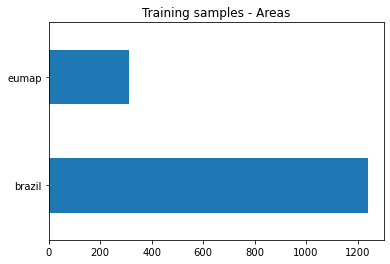

In [7]:
train_samples['area'].value_counts().plot(kind='barh', title="Training samples - Areas")

<AxesSubplot:title={'center':'Training samples - Classes'}>

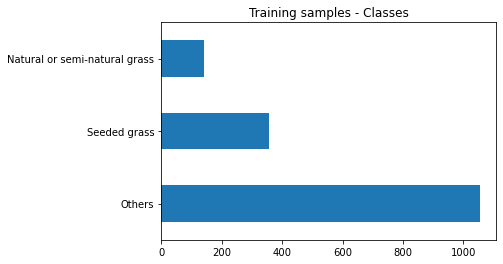

In [8]:
train_samples['class_label'].value_counts().plot(kind='barh', title="Training samples - Classes")

Let's **restrict** the samples only for Europe (```eumap```) and **merge** the two classes of pastures:

In [9]:
train_samples = train_samples[train_samples['area'] == 'eumap']

train_samples.loc[:,'class'] = train_samples['class'].astype('str').map({
    "1": "1",
    "2": "1",
    "3": "2",
})

train_samples.loc[:,'class_label'] = train_samples['class_label'].astype('str').map({
    "Seeded grass": "1-Grass",
    "Natural or semi-natural grass": "1-Grass",
    "Others": "0-Others",
})

How many samples we have now?

<AxesSubplot:title={'center':'Training samples - Aggreg. classes'}>

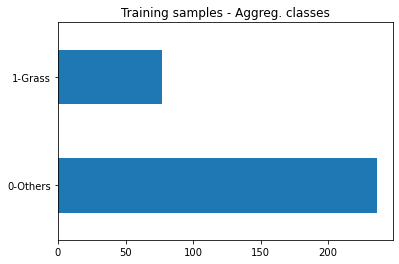

In [10]:
train_samples['class_label'].value_counts().plot(kind='barh', title="Training samples - Aggreg. classes")

## Raster layers through STAC

Now that we have only samples for Europe, it's possible to use the [Open Environmental Data Cube EU (EcoDataCube.eu)](http://stac.opendatascience.eu) to find raster layers to perform a classification task for the pasture areas. 

Let's use [pystac](https://pystac.readthedocs.io/en/stable/) to access the catalog:

In [11]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj/'

from pathlib import Path
import numpy as np
from eumap.misc import ttprint
import pystac
import rasterio

STAC_URL = 'https://s3.eu-central-1.wasabisys.com/stac/odse/catalog.json'
catalog = pystac.Catalog.from_file(STAC_URL)

Considering that the current implementation of EcoDataCube.eu is a static catalog, without the [search endpoint](https://github.com/radiantearth/stac-api-spec/blob/master/item-search/README.md), we need to use local [STAC index](https://eumap.readthedocs.io/en/latest/_autosummary/eumap.datasets.eo.utils.STACIndex.html#eumap.datasets.eo.utils.STACIndex), based on [whoosh](https://whoosh.readthedocs.io/en/latest/searching.html), which allow the users search for specific layers. The function ``_collection_assets`` is responsible to read all the assets from a specific collection organizing them in a [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [12]:
import pandas as pd

def _collection_assets(catalog, collection_id, 
                       media_types = [pystac.MediaType.GEOTIFF, pystac.MediaType.COG]):
  
  result = []

  for collection_item in catalog.get_child(collection_id).get_all_items():
    for item_id, item in collection_item.get_assets().items():
      if item.media_type in media_types: # https://pystac.readthedocs.io/en/stable/api/pystac.html#pystac.MediaType
        result.append({
          "collection": collection_item.id,
          "asset": item_id,
          "start_datetime": collection_item.properties['start_datetime'],
          "end_datetime": collection_item.properties['end_datetime'],
          "url": item.href
        })
  
  result = pd.DataFrame(result)
  result['start_datetime'] = pd.to_datetime(result['start_datetime'])
  result['end_datetime'] = pd.to_datetime(result['end_datetime'])
  result['year'] = result['end_datetime'].dt.year

  return result

Let's use the STAC index to look for Landsat data only for the **SWIR1** band. The [Woosh query language](https://whoosh.readthedocs.io/en/latest/querylang.html) is very flexible.

In [13]:
from eumap.datasets.eo import STACIndex

index = STACIndex(catalog, verbose=True)

query = '(Quarterly AND swir1 AND landsat)'
result = index.search(query, field='title')

asset_cogs = []
for r in result:
  collection_id = r['id']
  collection = r['title']
  ttprint(f'Reading {collection} ({collection_id})')
  asset_cogs.append(_collection_assets(catalog, collection_id))

asset_cogs = pd.concat(asset_cogs)
asset_cogs

[07:03:19] Retriving all collections from Open Environmental Data Cube Europe
[07:04:41] Creating index for 146 collections
[07:04:41] Reading Quarterly SWIR1 band of GLAD landsat ARD (2000–2020) (lcv_swir1_landsat.glad.ard)


collection      asset  \
0    lcv_swir1_landsat.glad.ard_1999.12.02..2000.03.20  swir1_p50   
1    lcv_swir1_landsat.glad.ard_1999.12.02..2000.03.20  swir1_p25   
2    lcv_swir1_landsat.glad.ard_1999.12.02..2000.03.20  swir1_p75   
3    lcv_swir1_landsat.glad.ard_1999.12.02..2000.03.20       qa_f   
4    lcv_swir1_landsat.glad.ard_2000.03.21..2000.06.24  swir1_p50   
..                                                 ...        ...   
331  lcv_swir1_landsat.glad.ard_2020.06.25..2020.09.12       qa_f   
332  lcv_swir1_landsat.glad.ard_2020.09.13..2020.12.01  swir1_p50   
333  lcv_swir1_landsat.glad.ard_2020.09.13..2020.12.01  swir1_p25   
334  lcv_swir1_landsat.glad.ard_2020.09.13..2020.12.01  swir1_p75   
335  lcv_swir1_landsat.glad.ard_2020.09.13..2020.12.01       qa_f   

    start_datetime end_datetime  \
0       1999-12-02   2000-03-20   
1       1999-12-02   2000-03-20   
2       1999-12-02   2000-03-20   
3       1999-12-02   2000-03-20   
4       2000-03-21   2000-06-24   
..             ...          ...   
331     2020-06-25   2020-09-12   
332     2020-09-13   2020-12-01   
333     2020-09-13   2020-12-01   
334     2020-09-13   2020-12-01   
335     2020-09-13   2020-12-01   

                                                   url  year  
0    https://s3.eu-central-1.wasabisys.com/eumap/lc...  2000  
1    https://s3.eu-central-1.wasabisys.com/eumap/lc...  2000  
2    https://s3.eu-central-1.wasabisys.com/eumap/lc...  2000  
3    https://s3.eu-central-1.wasabisys.com/eumap/lc...  2000  
4    https://s3.eu-central-1.wasabisys.com/eumap/lc...  2000  
..                                                 ...   ...  
331  https://s3.eu-central-1.wasabisys.com/eumap/lc...  2020  
332  https://s3.eu-central-1.wasabisys.com/eumap/lc...  2020  
333  https://s3.eu-central-1.wasabisys.com/eumap/lc...  2020  
334  https://s3.eu-central-1.wasabisys.com/eumap/lc...  2020  
335  https://s3.eu-central-1.wasabisys.com/eumap/lc...  2020  

[336 rows x 6 columns]

For now, let's use only the **percentile 50th** and see how many COG mosaics we have available in the catalog:

In [14]:
from pathlib import Path
raster_urls = list(asset_cogs[asset_cogs['asset'].str.contains('swir1_p50')]['url'])
print(f'Number of urls: {len(raster_urls)}')

Number of urls: 84


What is the most recent year?

In [15]:
asset_cogs['year'].max()

2020

And what are the URLs for this year?

In [16]:
from pathlib import Path
raster_urls = list(asset_cogs[
    np.logical_and(
      asset_cogs['asset'].str.contains('swir1_p50'),
      asset_cogs['year'] == 2020
    )
]['url'])
raster_urls

['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.12.02..2020.03.20_eumap_epsg3035_v1.1.tif',
 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.03.21..2020.06.24_eumap_epsg3035_v1.1.tif',
 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.06.25..2020.09.12_eumap_epsg3035_v1.1.tif',
 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.09.13..2020.12.01_eumap_epsg3035_v1.1.tif']

## Spacetime overlay

For the temporal layers, the samples may be **filtered** by year and **overlaid** on yearly raster files. For example, the overlay for samples of 2020 will consider the 2020 Landsat SWIR1 images, while the samples from 2019 will consider the 2019 images. The [eumap.SpaceTimeOverlay](https://eumap.readthedocs.io/en/latest/_autosummary/eumap.mapper.SpaceTimeOverlay.html#eumap.mapper.SpaceTimeOverlay) class implements this approach, however we need to provide a [geopandas.GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) informing which column ([datetime type](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)) must be used to retrieve the **year** information.

So first, we need to convert the samples to [geopandas.GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) using the ```longitude``` and ```latitude``` columns ([WGS84 - EPSG:4326](https://epsg.io/4326)), reprojecting the point geometry to same [coordinate reference system (CRS)](https://rasterio.readthedocs.io/en/latest/api/rasterio.crs.html#:~:text=A%20coordinate%20reference%20system%20(CRS,Petroleum%20Survey%20Group%20authority%20file.) of the Landsat SWIR1 images. We also need to use the ``year`` column to create new a ``datetime`` column:

In [17]:
import geopandas as gpd
import rasterio

ds = rasterio.open(raster_urls[0])

train_samples = gpd.GeoDataFrame(train_samples, geometry=gpd.points_from_xy(train_samples['longitude'], train_samples['latitude']))
train_samples = train_samples.set_crs('EPSG:4326').to_crs(ds.crs)
train_samples['date'] = pd.to_datetime(train_samples['year'], format='%Y')

Now, we need to have **COG URLs** with **year placeholder** (```{year}```, ```{year_minus_1}```, ```{year_plus_1}```): 

In [18]:
fn_layers = [ r.replace('2020', '{year}').replace('2019', '{year_minus_1}') for r in raster_urls ]
fn_layers

['https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_{year_minus_1}.12.02..{year}.03.20_eumap_epsg3035_v1.1.tif',
 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_{year}.03.21..{year}.06.24_eumap_epsg3035_v1.1.tif',
 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_{year}.06.25..{year}.09.12_eumap_epsg3035_v1.1.tif',
 'https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_{year}.09.13..{year}.12.01_eumap_epsg3035_v1.1.tif']

Finally we are ready to execute the spacetime overlay:

In [19]:
from eumap.mapper import SpaceTimeOverlay

overlay = SpaceTimeOverlay(points=train_samples, col_date='date', fn_layers=fn_layers, verbose=True)
overlaid_samples = overlay.run()
overlaid_samples

[07:05:31] Overlay 75 points from 2019 in 4 raster layers
[07:05:34] Overlay 199 points from 2020 in 4 raster layers
[07:05:37] Overlay 39 points from 2018 in 4 raster layers
[07:05:40] Running the overlay for 2019
[07:05:47] 1/4 lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.03.21..2019.06.24_eumap_epsg3035_v1.1
[07:05:47] 2/4 lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.09.13..2019.12.01_eumap_epsg3035_v1.1
[07:05:48] 3/4 lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.06.25..2019.09.12_eumap_epsg3035_v1.1
[07:05:48] 4/4 lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2018.12.02..2019.03.20_eumap_epsg3035_v1.1
[07:05:48] Running the overlay for 2020
[07:06:01] 1/4 lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.06.25..2020.09.12_eumap_epsg3035_v1.1
[07:06:02] 2/4 lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.03.21..2020.06.24_eumap_epsg3035_v1.1
[07:06:02] 3/4 lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.12.02..2020.03.20_eumap_epsg3035_v1.1
[07:06:02] 4/4 lcv_swir1_landsat.glad.ard_p50

tile_id   area  year   latitude  longitude class  class_pct class_label  \
1239     939  eumap  2019  42.911848  18.750127     2        100    0-Others   
1240    1004  eumap  2019  47.174468  12.802591     1        100     1-Grass   
1241    1004  eumap  2019  47.174353  12.807017     2        100    0-Others   
1242    1004  eumap  2019  47.171446  12.802429     2        100    0-Others   
1243     845  eumap  2019  65.450093  13.260907     2        100    0-Others   
...      ...    ...   ...        ...        ...   ...        ...         ...   
1528     872  eumap  2018  44.934885   4.434348     2        100    0-Others   
1538    1400  eumap  2018  45.982985  16.219690     2        100    0-Others   
1539     606  eumap  2018  69.883908  29.270066     1        100     1-Grass   
1540    1054  eumap  2018  42.816751   0.977441     1        100     1-Grass   
1541    1074  eumap  2018  65.532747  20.433656     2         89    0-Others   

                             geometry       date  overlay_id  \
1239  POINT (5035808.000 2242197.999) 2019-01-01           1   
1240  POINT (4533570.000 2677453.000) 2019-01-01           2   
1241  POINT (4533906.000 2677453.000) 2019-01-01           3   
1242  POINT (4533570.000 2677117.000) 2019-01-01           4   
1243  POINT (4473263.000 4708112.000) 2019-01-01           5   
...                               ...        ...         ...   
1528  POINT (3881356.000 2441198.999) 2018-01-01          35   
1538  POINT (4802914.000 2561275.000) 2018-01-01          36   
1539  POINT (5058528.000 5298773.000) 2018-01-01          37   
1540  POINT (3582875.000 2234352.999) 2018-01-01          38   
1541  POINT (4804739.000 4750033.000) 2018-01-01          39   

      lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.03.21...06.24_eumap_epsg3035_v1.1  \
1239                                               50.0                              
1240                                               78.0                              
1241                                               73.0                              
1242                                               21.0                              
1243                                               44.0                              
...                                                 ...                              
1528                                               41.0                              
1538                                               49.0                              
1539                                               57.0                              
1540                                               59.0                              
1541                                               54.0                              

      lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.09.13...12.01_eumap_epsg3035_v1.1  \
1239                                               35.0                              
1240                                              106.0                              
1241                                               88.0                              
1242                                               28.0                              
1243                                               42.0                              
...                                                 ...                              
1528                                               48.0                              
1538                                               46.0                              
1539                                               55.0                              
1540                                               45.0                              
1541                                               52.0                              

      lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.06.25...09.12_eumap_epsg3035_v1.1  \
1239                                               43.0                              
1240                                 

## Modeling (LandMapper) 

To run the modeling we will use the [LandMapper](https://eumap.readthedocs.io/en/latest/_autosummary/eumap.mapper.LandMapper.html#eumap.mapper.LandMapper) class, which trains a ML model and do spacetime predictions for different years. The implementation is fully  compatible with [sklearn](https://scikit-learn.org/stable/modules/classes.html) receiving an ```estimator``` (e.g. [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [KerasClassifier](https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasClassifier), [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier)), [BaseSearchCV](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) implementation to find the best hyperparamenter for the specified estimator. For the **hyperparameter optimization** it's possible to select different [scoring metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) and hyperparameter range values.

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint

estimator = RandomForestClassifier(n_estimators=50, random_state=1989)

param_distributions = {
    "criterion": [ "gini", "entropy"],
    "max_depth": randint(5, 100),
    "max_features": uniform(loc=0, scale=1),
    "min_samples_split": randint(2, 40),
    "min_samples_leaf": randint(1, 10),
    "class_weight": [None, "balanced", "balanced_subsample" ]
}


# https://scikit-learn.org/stable/modules/model_evaluation.html
hyperpar = RandomizedSearchCV(
    estimator = estimator,
    scoring = 'f1_macro',
    param_distributions = param_distributions,
    n_iter = 10,
    random_state=1989
)

The evaluation metric will be calculated using a **cross validation strategy**, using different parts of samples to train and validate the model. Here we will use a 5-fold cv, but others [validation strategies](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) are also supported.

Let’s optimize and train the model:

In [21]:
from eumap.mapper import LandMapper

feat_col_prfxs = ['lcv']
target_col = 'class'
cv = 5

landmapper = LandMapper(points=overlaid_samples,
                        feat_col_prfxs = feat_col_prfxs,
                        target_col = target_col,
                        estimator = estimator,
                        hyperpar_selection = hyperpar,
                        cv = cv,
                        min_samples_per_class=0.0,
                        verbose = True)
landmapper.train()

[07:06:08] Transforming class:
[07:06:08]  -Original classes: [1. 2.]
[07:06:08]  -Transformed classes: [0 1]
[07:06:08] Optimizing hyperparameters for RandomForestClassifier
[07:06:11]  0.59156 (+/-0.04734) from {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 65, 'max_features': 0.6509816786331734, 'min_samples_leaf': 7, 'min_samples_split': 30}
[07:06:11]  0.60759 (+/-0.07118) from {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 84, 'max_features': 0.0558379499139835, 'min_samples_leaf': 5, 'min_samples_split': 30}
[07:06:11]  0.52744 (+/-0.06489) from {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 19, 'max_features': 0.5883611551488165, 'min_samples_leaf': 3, 'min_samples_split': 7}
[07:06:11]  0.59578 (+/-0.09046) from {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 86, 'max_features': 0.7073018598426786, 'min_samples_leaf': 3, 'min_samples_split': 27}
[07:06:11]  0.46986 (+/-0.18167) from {'class_w

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:06:11] Training RandomForestClassifier using all samples


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Let’s understand what happened here: 

1. **Different combinations** of hyperparameters were evaluated, 
2. The best one was chosen and all the samples were cross validated to derive other **evaluation metrics**, 
3. A final model was trained using **all the samples**, without cv. 
    
The **final model** is the one that will be used to perform the predictions.

We can check evaluation metrics for the best model, derived cross-validation:

In [22]:
print(landmapper.eval_report)

              precision    recall  f1-score   support

           0       0.38      0.69      0.49        77
           1       0.86      0.64      0.73       236

    accuracy                           0.65       313
   macro avg       0.62      0.66      0.61       313
weighted avg       0.75      0.65      0.68       313



We can also can access the **raw cv results**, derived through [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html):

In [23]:
pd.DataFrame({
    'Expected LC-class':landmapper.target,
    'Predict LC-class': landmapper.eval_pred}
)

Expected LC-class  Predict LC-class
0                    1                 1
1                    0                 0
2                    1                 0
3                    1                 1
4                    1                 1
..                 ...               ...
308                  1                 1
309                  1                 1
310                  0                 0
311                  0                 1
312                  1                 0

[313 rows x 2 columns]

## Spacetime prediction 

To demonstrate the prediction using the trained model we will use a [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/) interactive map to select a bounding box in any place o Europe (Scotland has several pasture areas). We can use `DrawControl` to do this task:

In [24]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, LayersControl

mapnik = basemap_to_tiles(basemaps.OpenStreetMap.Mapnik)
mapnik.base = True
mapnik.name = 'Mapnik Layer'

esri = basemap_to_tiles(basemaps.Esri.WorldImagery)
esri.base = True
esri.name = 'ESRI Imagery Layer'

m = Map(center=(51.98, 5.65), zoom = 4, layers = [esri, mapnik])

draw_control = DrawControl()
draw_control.rectangle = {
    "shapeOptions": {
        "color": "#ff0000",
        "fillOpacity": 0,
        "opacity": 1
    }
}

m.add_control(draw_control)
m.add_control(LayersControl())

m

Map(center=[51.98, 5.65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

We can now select the region of interest as a feature from `DrawControl.data` and get its bounds:

In [26]:
from shapely.geometry import shape
geometry = shape(draw_control.data[-1]['geometry'])
bounds = geometry.bounds
bounds

(-3.614502, 56.54791, -3.15239, 56.677893)

`ipyleaflet.DrawControl` defines geometries in the WGS84 CRS, so it's necessary reproject the region of interest to same CRS used by [EcoDataCube.eu](http://stac.opendatascience.eu), and later use it to define a [Window](https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html):

In [29]:
from pyproj import Transformer
from rasterio.windows import Window, from_bounds

base_raster = rasterio.open(raster_urls[0])

transformer = Transformer.from_crs("epsg:4326", base_raster.crs, always_xy=True)
left, bottom = transformer.transform(bounds[0], bounds[1])
right, top = transformer.transform(bounds[2], bounds[3])

window = from_bounds(left, bottom, right, top, base_raster.transform)
print(f'Reprojected bounds: left={left}, bottom={bottom}, right={right}, top={top}')
print(f'window: {window}')

Reprojected bounds: left=3488741.3232860006, bottom=3795380.0811944967, right=3519338.365422482, top=3804341.5590729015
window: Window(col_off=86291.37744286668, row_off=55188.948030903295, width=1019.9014045493823, height=298.71592928016616)


To be able to predict using LandMapper, we need to provide the **same** covariates / raster layers as input. Let's check what are the **expected inputs**:

In [38]:
print('LandMapper input:')
for cov in landmapper.feature_cols:
    print(f' - {cov}')

print('\nRaster layers:')
for r in raster_urls:
    print(f' - {r}')

LandMapper input:
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.03.21...06.24_eumap_epsg3035_v1.1
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.09.13...12.01_eumap_epsg3035_v1.1
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.06.25...09.12_eumap_epsg3035_v1.1
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.12.02...03.20_eumap_epsg3035_v1.1

Raster layers:
 - https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.12.02..2020.03.20_eumap_epsg3035_v1.1.tif
 - https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.03.21..2020.06.24_eumap_epsg3035_v1.1.tif
 - https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.06.25..2020.09.12_eumap_epsg3035_v1.1.tif
 - https://s3.eu-central-1.wasabisys.com/eumap/lcv/lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.09.13..2020.12.01_eumap_epsg3035_v1.1.tif


We are trying to do a **spacetime prediction**, so it's necessary to provide the argument [dict_layers_newnames](https://eumap.readthedocs.io/en/latest/_autosummary/eumap.mapper.LandMapper.html#eumap.mapper.LandMapper.predict) to match the raster layers with the expected inputs:

In [45]:
dict_layers_newnames = {}

for r in raster_urls:
    key = Path(r).stem
    value = key.replace('2020', '').replace('2019', '')
    dict_layers_newnames[value] = key

print('Argument dict_layers_newnames:')
for key, value in dict_layers_newnames.items():
    print(f' - {key}\n - {value}\n')

Argument dict_layers_newnames:
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.12.02...03.20_eumap_epsg3035_v1.1
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.12.02..2020.03.20_eumap_epsg3035_v1.1

 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.03.21...06.24_eumap_epsg3035_v1.1
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.03.21..2020.06.24_eumap_epsg3035_v1.1

 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.06.25...09.12_eumap_epsg3035_v1.1
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.06.25..2020.09.12_eumap_epsg3035_v1.1

 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.09.13...12.01_eumap_epsg3035_v1.1
 - lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.09.13..2020.12.01_eumap_epsg3035_v1.1



Finally we are ready to **execute** the prediction for the region of interest, producing as output a GeoTIFF file (```eumap_pasture_classification_2020.tif```):

In [48]:
fn_layers = [ Path(r) for r in raster_urls ]
landmapper.predict(
    fn_layers = fn_layers, 
    fn_output = 'eumap_pasture_classification_2020.tif', 
    spatial_win = window,
    dict_layers_newnames = dict_layers_newnames
)

[07:36:15] Reading 4 raster files using 4 workers
[07:36:16] Renaming lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2019.12.02..2020.03.20_eumap_epsg3035_v1.1 to lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.12.02...03.20_eumap_epsg3035_v1.1
[07:36:16] Renaming lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.03.21..2020.06.24_eumap_epsg3035_v1.1 to lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.03.21...06.24_eumap_epsg3035_v1.1
[07:36:16] Renaming lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.06.25..2020.09.12_eumap_epsg3035_v1.1 to lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.06.25...09.12_eumap_epsg3035_v1.1
[07:36:16] Renaming lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_2020.09.13..2020.12.01_eumap_epsg3035_v1.1 to lcv_swir1_landsat.glad.ard_p50_30m_0..0cm_.09.13...12.01_eumap_epsg3035_v1.1
[07:36:16] Executing RandomForestClassifier
[07:36:17] RandomForestClassifier prediction time: 0.58 segs


['eumap_pasture_classification_2020.tif']

We can have a very simple visualization of the result using [eumap.plotter](https://eumap.readthedocs.io/en/latest/_autosummary/eumap.plotter.html):

In [ ]:
from eumap import plotter 
plotter.plot_rasters('eumap_pasture_classification_2020.tif', cmaps="OrRd_r")

Probably it's better open the prediction output in [QGIS](https://qgis.org).

## Additional information:

There are additional tutorials explaining:
- [Space and spacetime overlay using a different dataset (eumap)](https://eumap.readthedocs.io/en/latest/notebooks/02_point_overlay.html),
- [Training / prediction probabilities and Ensemble Machine Learning (EML) modeling (eumap)](https://eumap.readthedocs.io/en/latest/notebooks/04_landcover_mapping_advanced.html),
- [Populating and accessing the STAC catalog (eumap)](https://eumap.readthedocs.io/en/latest/notebooks/10_stac.html),
- [High performance computing in Python (ODSE 2022)](https://gitlab.com/geoharmonizer_inea/odse-workshop-2022/-/blob/main/python_training/03_high_performance_computing.ipynb).

Now try to **update** the workflow to consider **more covariates** and **predict probabilities!**

![Go!](Accessing_and_using_data_cubes_summer_school_2022/go.jpg)